<a href="https://colab.research.google.com/github/OlajideFemi/GeneralContent/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Tesla_Nasdaq_Stock.csv')

In [ ]:
#Prepare the dataset
features_df = data.iloc[:,2:]
print (features_df.head())
target_df = data['Close/Last']
print (target_df.head())

features = data.iloc[:,2:].values
target = data['Close/Last'].values

     Volume     Open     High      Low
0  18337900  1043.21  1048.44  1022.44
1  26482350  1052.39  1076.59  1021.54
2  29782850  1073.47  1079.00  1027.70
3  26691670  1136.30  1152.87  1087.30
4  27392570  1089.38  1149.91  1072.53
0    1025.49
1    1057.26
2    1045.76
3    1091.26
4    1145.45
Name: Close/Last, dtype: float64


In [ ]:
from re import X
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#Scale the features and target
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))


In [ ]:
#Reshape input to be [samples, timestep, features] which is required for RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0],1,X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0],1,X_test_scaled.shape[1]))

In [ ]:
#Build the RNN model
model = Sequential([SimpleRNN(256, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True), Dropout(0.25), SimpleRNN(128, return_sequences=True), Dropout(0.25), SimpleRNN(64), Dense(1)])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#My model isnt wrong, but it isnt temporal yet

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0180 - val_loss: 1.7815e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 9.3982e-05
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 5.7243e-05
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.5942e-04 - val_loss: 2.7558e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7643e-04 - val_loss: 1.7285e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7894e-04 - val_loss: 2.0163e-05
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2263e-04 - val_loss: 2.9072e-05
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4918e-04 - val_loss: 1.3171e-04
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 1.1633e-04
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5162e-04 - val_loss: 4.6398e-05
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2296e-04 - val_loss: 7.4792e-0

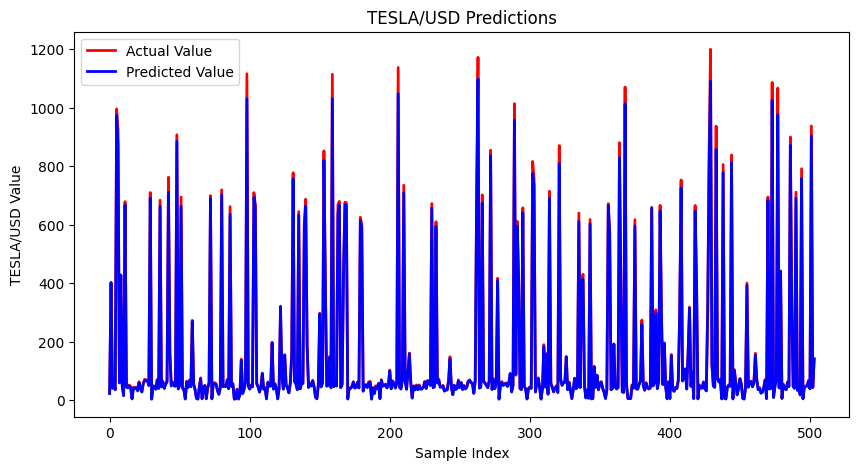

In [ ]:
# Train the model
history = model.fit(
    X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=1
)

# Predict and inverse transform the predictions
preds_scaled = model.predict(X_test_reshaped)
preds = scaler.inverse_transform(preds_scaled)

# Plot the predictions against the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Value', color='red', linewidth=2)
plt.plot(preds, label='Predicted Value', color='blue', linewidth=2)
plt.title('TESLA/USD Predictions')
plt.xlabel('Sample Index')
plt.ylabel('TESLA/USD Value')
plt.legend()
plt.show()
